# **Data Constants**

In [10]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Dependencies**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


# Load the dataset from Google Drive
file_path = '/content/drive/My Drive/winequality/winequalityred.csv'  # Update the path accordingly
dataset = pd.read_csv(file_path, delimiter=';')  # Specify the delimiter as ';'

# Explore the data
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# **Prepare Data**

In [12]:
# Prepare data
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
             'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates',
             'alcohol', 'pH']]
y = dataset['density']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Train and Visualize**

In [13]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Number of samples in test set
n = len(y_test)

# Number of features
p = X_test.shape[1]

# Adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)


Mean Squared Error: 5.261034315621762e-07
Mean Absolute Error: 0.0005618276010562331
R-squared: 0.8690129184546858
Adjusted R-squared: 0.8647738543270057


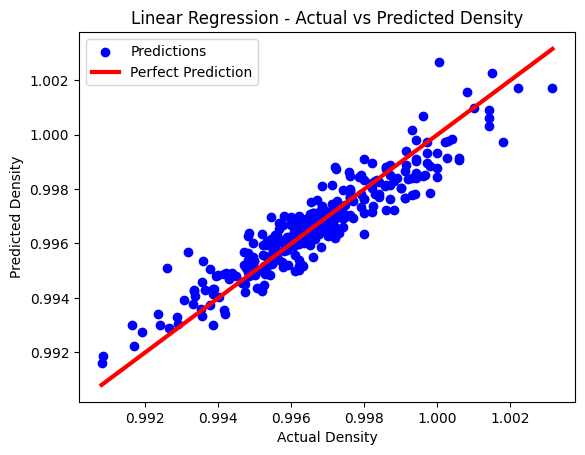

In [14]:
# Visualize the results
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=3, label='Perfect Prediction')
plt.xlabel('Actual Density')
plt.ylabel('Predicted Density')
plt.title('Linear Regression - Actual vs Predicted Density')
plt.legend()
plt.show()